In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
import matplotlib.lines as mlines
import matplotlib.markers as markers
from itertools import count
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Dataset con longitudes y latitudes

In [2]:
geo_data = pd.read_csv('lat_long_countries.csv', sep=';',header=0)
geo_data['LATITUDE'] = geo_data['LATITUDE'].replace(',', '.', regex=True).apply(pd.to_numeric)
geo_data['LONGITUDE'] = geo_data['LONGITUDE'].replace(',', '.', regex=True).apply(pd.to_numeric)
geo_country_data = geo_data
geo_country_data

,CODE,LATITUDE,LONGITUDE,COUNTRY
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


# Dataset de RASFF

In [3]:
data = pd.read_csv('C:/Users/Ceiec04/Desktop/Prediccion_Alertas_Alimentarias/Datasets/full_RASFF_DATA_16092019.csv', sep=';', 
                   header=0, index_col = 0)
data['DATE_CASE'] =pd.to_datetime(data.DATE_CASE, yearfirst=True, format = '%d/%m/%Y')
data = data.replace('Falkland Islands','Falkland Islands [Islas Malvinas]',regex=True)
data = data.replace('Myanmar','Myanmar [Burma]',regex=True)
data = data.replace("Côte d'Ivoire","C?te d'Ivoire",regex=True)
data = data.replace("Faeroe Islands","Faroe Islands",regex=True)
data = data.replace("Democratic Republic of the Congo","xxxx",regex=True)
data = data.replace("Congo","Congo [Republic]",regex=True)
data = data.replace("xxxx","Congo [DRC]",regex=True)
data = data.replace("Republic of North Macedonia","Macedonia [FYROM]",regex=True)
data = data.replace("Curaçao","Netherlands Antilles",regex=True)
data = data.replace("West Bank and Gaza Strip","Gaza Strip",regex=True)
data = data.replace("Saint Barthélemy","Guadeloupe",regex=True)
data = data.replace("Macao","Macau",regex=True)
data = data.replace("Sint Maarten","Netherlands Antilles",regex=True)
data = data.replace("Saint Martin","Netherlands Antilles",regex=True)
data = data.replace("São Tomé and Príncipe","Gabon",regex=True)
data = data.replace("Åland Islands","Finland",regex=True)
data = data.replace("East Timor","Timor-Leste",regex=True)
data = data.replace("Réunion","Mauritius",regex=True)
data = data.replace("US Virgin Islands","U.S. Virgin Islands",regex=True)
data = data.replace("Serbia and Montenegro","Serbia",regex=True)
data

,NUMBER,CLASSIF,DATE_CASE,REF,NOT_COUNTRY,SUBJET,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,PRODUCT,HAZARDS,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
0,1.0,alert,2019-09-13,2019.3276,France,foodborne outbreak suspected (Salmonella enter...,meat and meat products (other than poultry),food,serious,no stock left,no distribution from notifying country,chilled raw minced horse meat,foodborne outbreak suspected,pathogenic micro-organisms,Romania,France,Belgium
1,3.0,alert,2019-09-13,2019.3262,Denmark,pyrrolizidine alkaloids (903 µg/kg - ppb) in n...,"cocoa and cocoa preparations, coffee and tea",food,serious,recall from consumers,no distribution from notifying country,nettle tea,pyrrolizidine alkaloids,natural toxins (other),Germany,Denmark,
2,5.0,information for attention,2019-09-13,2019.3271,Poland,sulphite (50 mg/kg - ppm) undeclared on biscui...,confectionery,food,serious,informing authorities,distribution restricted to notifying country,biscuits,sulphite undeclared,food additives and flavourings,Croatia,Poland,
3,7.0,alert,2019-09-13,2019.3269,Spain,arsenic (0.38; 0.29; 0.31 mg/kg - ppm) in full...,cereals and bakery products,food,serious,withdrawal from the market,distribution to non-member countries,full brown rice,arsenic,metals,Italy,"Andorra,Spain",INFOSAN
4,9.0,border rejection,2019-09-13,2019.3267,France,ochratoxin A (30 µg/kg - ppb) in raisins from ...,fruits and vegetables,food,serious,re-dispatch,product not (yet) placed on the market,raisins,ochratoxin a,mycotoxins,Turkey,,France
5,11.0,border rejection,2019-09-13,2019.3266,Poland,Salmonella group E4 (presence /25g) in rapesee...,feed materials,feed,not serious,informing recipient(s),product not (yet) placed on the market,rapeseed meal,salmonella group e4,pathogenic micro-organisms,Ukraine,,Poland
6,13.0,information for attention,2019-09-13,2019.3264,Denmark,foodborne outbreak suspected to be caused by a...,bivalve molluscs and products thereof,food,serious,withdrawal from recipient(s),product (presumably) no longer on the market,live oysters (crassostrea gigas),"foodborne outbreak suspected,norovirus","pathogenic micro-organisms,pathogenic micro-or...",France,Denmark,
7,15.0,border rejection,2019-09-13,2019.3259,Netherlands,mercury (1.8 mg/kg - ppm) in frozen marlin loi...,fish and fish products,food,serious,import not authorised,product not (yet) placed on the market,frozen marlin loin and steaks,mercury,metals,Vietnam,,Netherlands
8,17.0,border rejection,2019-09-12,2019.3251,Germany,aflatoxins (B1 = 0.049 mg/kg - ppm) in groundn...,feed materials,feed,serious,re-dispatch,product not (yet) placed on the market,groundnuts for wildbirds,aflatoxins,mycotoxins,United States,,Germany
9,19.0,border rejection,2019-09-12,2019.3254,Bulgaria,formetanate (0.096 mg/kg - ppm) in peppers fro...,fruits and vegetables,food,serious,destruction,product not (yet) placed on the market,peppers,formetanate,pesticide residues,Turkey,,"Bulgaria,Netherlands"


# Función para dibujar el mapa

In [10]:
def draw_map(data,geo_data,monthly=False, month = 0):
    if monthly == True:
        month_mask = data['DATE_CASE'].map(lambda x: x.month) == month
        data = data[month_mask]
        title = "Month:"+str(month)
    else:
        title = "General Graph"

    all_routes = []

    for index, row in data.iterrows():
        origin=row['COUNT_ORIGEN'].split(",")   
        destiny=row['COUNT_DESTIN'].split(",") 
        concern=row['COUNT_CONCERN'].split(",")


        for i in origin:

            if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
                for j in destiny:
                    if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                        route = []
                        route.append(i)
                        route.append(j)
                        all_routes.append(route)

                        for k in concern:
                            if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                                route = []
                                route.append(i)
                                route.append(k)
                                all_routes.append(route)   
                    else:
                        for k in concern:
                            if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                                route = []
                                route.append(i)
                                route.append(k)
                                all_routes.append(route)
    
    routes = pd.DataFrame(all_routes)
    routes.columns = 'Origen', 'Destino'
    origen_size = routes['Origen'].value_counts()
    origen_size = pd.DataFrame(origen_size).reset_index()
    origen_size.columns = ('COUNTRY', 'Origen_size')
    destino_size = routes['Destino'].value_counts()
    destino_size = pd.DataFrame(destino_size).reset_index()
    destino_size.columns = ('COUNTRY', 'Destino_size')
    node_size = routes['Origen'].append(routes.loc[routes['Origen'] != routes['Destino'], 'Destino']).value_counts()
    node_size = pd.DataFrame(node_size).reset_index()
    node_size.columns = ('COUNTRY', 'Nodo_size')
    node_data = geo_data.join(node_size.set_index('COUNTRY'), on=['COUNTRY'])
    node_data = node_data.join(origen_size.set_index('COUNTRY'), on=['COUNTRY'])
    node_data = node_data.join(destino_size.set_index('COUNTRY'), on=['COUNTRY'])
    node_data = node_data.fillna(0)
    node_data['porc_origen'] = [node_data.set_index('CODE')['Origen_size'][x] /node_data.set_index('CODE')['Nodo_size'][x] if node_data.set_index('CODE')['Nodo_size'][x] != 0 else 0 for x in node_data['CODE']] 
    por_origen = pd.Series(node_data.porc_origen.values,index=node_data.COUNTRY).to_dict()
    routes = routes.groupby(routes.columns.tolist()).size().reset_index().\
    rename(columns={0:'Number'})
    routes.columns = ('Origen', 'Destino', 'Number')
    geo_data=  geo_data[['LATITUDE','LONGITUDE','COUNTRY']]
    geo_data = geo_data.rename(columns = {'COUNTRY':'Origen'})
    cols = ['Origen']
    routes = routes.join(geo_data.set_index(cols), on=cols)
    routes = routes.rename(columns = {'LATITUDE':'ORIG_LAT','LONGITUDE': 'ORIG_LON' })
    geo_data = geo_data.rename(columns = {'Origen':'Destino'})
    cols = ['Destino']
    routes = routes.join(geo_data.set_index(cols), on=cols)
    routes = routes.rename(columns = {'LATITUDE':'DEST_LAT','LONGITUDE': 'DEST_LON' })
    routes_num = routes[['ORIG_LAT','ORIG_LON','DEST_LAT','DEST_LON','Number']]
    routes_num = routes_num.replace(',', '.', regex=True)
    routes_num = routes_num.apply(pd.to_numeric)
    routes_num['Origen'] = routes['Origen']
    routes_num['Destino'] = routes['Destino']
    full_routes = routes_num
    
    
    
    #MAP 1: COMPLETE WORLD MAP

    graph = nx.from_pandas_edgelist(full_routes, source = 'Origen', target = 'Destino',
                            edge_attr = 'Number', create_using = nx.DiGraph(directed=True))

    nx.set_node_attributes(graph, por_origen, 'por_origen')

    plt.figure(figsize=(15,20))
    m = Basemap(projection='mill',llcrnrlon = -111.514246, llcrnrlat =-43.539769 , urcrnrlon = 145.194897, urcrnrlat=75.233846)

    mx, my = m(node_data['LONGITUDE'].values, node_data['LATITUDE'].values)
    pos = {}
    for count, elem in enumerate (node_data['COUNTRY']):
        pos[elem] = (mx[count], my[count])


    labels = {}
    for x in node_data['CODE'] :
        if  node_data.set_index('CODE')['Nodo_size'][x] >= max(node_data.set_index('CODE')['Nodo_size'])/5:
            for y in graph.nodes():
                if  node_data.set_index('COUNTRY')['Nodo_size'][y] >= max(node_data.set_index('CODE')['Nodo_size'])/5:
                    if node_data.set_index('COUNTRY')['CODE'][y] == x:
                        labels[y] = x

    edges = graph.edges()
    weights = [graph[u][v]['Number'] for u,v in edges] 
    weights[:] = [x /200 for x in weights]


    nc = nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes()],node_color = list(nx.get_node_attributes(graph,'por_origen').values()),vmin = 0,vmax = 1,cmap=plt.cm.get_cmap('rainbow'), alpha = 1,node_size =  [node_data.set_index('COUNTRY')['Nodo_size'][x]/max(node_data.set_index('COUNTRY')['Nodo_size'])*600 if node_data.set_index('COUNTRY')['Nodo_size'][x] > max(node_data.set_index('COUNTRY')['Nodo_size'])/15 else node_data.set_index('COUNTRY')['Nodo_size'][x]/max(node_data.set_index('COUNTRY')['Nodo_size'])*800  for x in graph.nodes()])

    nx.draw_networkx_labels(G = graph, pos = pos, font_size=8,
                            labels = labels,font_color='k',font_weight = 'bold')


    nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g',edge_vmin = 0,edge_vmax =1, edge_cmap=plt.cm.get_cmap('Greens'), width = weights, alpha=0.8, arrows = False)

    m.drawcountries(linewidth = 0.7,color = 'dimgray')
    m.drawstates(linewidth = 0.2,color = 'dimgray')
    m.drawcoastlines(linewidth=2,color = 'dimgray')
    m.fillcontinents(alpha = 0)
    line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="white",markeredgecolor="k", markersize=20)
    line2 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
    plt.legend((line1, line2), ('Node total size (In Degree + Out Degree)', 'Alert routes'),loc=4, fontsize = 'xx-large')
    plt.title("Network graph of RASFF Alerts routes ("+ title +")", fontsize = 30)

    plt.tight_layout()

    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(nc,cax)
    cbar.set_label('COUNTRY BEHAVIOR', rotation=270)
    plt.savefig(str(month)+"_map.png", format = "png", dpi = 300,bbox_inches='tight')
    plt.show()
    print ("Map 1 successful visualization")    

    
    
    #MAP 2: COMPLETE EUROPE MAP
    
    
    graph = nx.from_pandas_edgelist(full_routes, source = 'Origen', target = 'Destino',
                            edge_attr = 'Number', create_using = nx.DiGraph(directed=True))

    nx.set_node_attributes(graph, por_origen, 'por_origen')

    plt.figure(figsize=(15,20))
    m = Basemap(projection='mill',llcrnrlon = -25.363250, llcrnrlat =30.431378 , urcrnrlon = 41.433512, urcrnrlat=66.008846)

    mx, my = m(node_data['LONGITUDE'].values, node_data['LATITUDE'].values)
    pos = {}
    for count, elem in enumerate (node_data['COUNTRY']):
        pos[elem] = (mx[count], my[count])


    labels = {}
    for x in node_data['CODE'] :
        if  node_data.set_index('CODE')['Nodo_size'][x] >= max(node_data.set_index('CODE')['Nodo_size'])/5:
            for y in graph.nodes():
                if  node_data.set_index('COUNTRY')['Nodo_size'][y] >= max(node_data.set_index('CODE')['Nodo_size'])/5:
                    if node_data.set_index('COUNTRY')['CODE'][y] == x:
                        labels[y] = x

    edges = graph.edges()
    weights = [graph[u][v]['Number'] for u,v in edges] 
    weights[:] = [x / max(weights)*5 for x in weights]


    nc = nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes()],node_color = list(nx.get_node_attributes(graph,'por_origen').values()),vmin = 0,vmax = 1,cmap=plt.cm.get_cmap('rainbow'), alpha = 1,node_size =  [node_data.set_index('COUNTRY')['Nodo_size'][x]/max(node_data.set_index('COUNTRY')['Nodo_size'])*600 if node_data.set_index('COUNTRY')['Nodo_size'][x] > max(node_data.set_index('COUNTRY')['Nodo_size'])/15 else node_data.set_index('COUNTRY')['Nodo_size'][x]/max(node_data.set_index('COUNTRY')['Nodo_size'])*800  for x in graph.nodes()])

    nx.draw_networkx_labels(G = graph, pos = pos, font_size=8,
                            labels = labels,font_color='k',font_weight = 'bold')


    nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g',edge_vmin = 0,edge_vmax =1, edge_cmap=plt.cm.get_cmap('Greens'), width = weights, alpha=0.8, arrows = True)

    m.drawcountries(linewidth = 0.7,color = 'dimgray')
    m.drawstates(linewidth = 0.2,color = 'dimgray')
    m.drawcoastlines(linewidth=2,color = 'dimgray')
    m.fillcontinents(alpha = 0)
    line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="white",markeredgecolor="k", markersize=20)
    line2 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
    plt.legend((line1, line2), ('Node total size (In Degree + Out Degree)', 'Alert routes'),loc=4, fontsize = 'xx-large')
    plt.title("Network graph of RASFF Alerts routes ("+ title +")", fontsize = 30)

    plt.tight_layout()

    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(nc,cax)
    cbar.set_label('COUNTRY BEHAVIOR', rotation=270)
    plt.savefig(str(month)+"europe_map.png", format = "png", dpi = 300,bbox_inches='tight')
    plt.show()
    print ("Map 2 successful visualization")


    
    #MAP 3: ZOOMED EUROPE MAP
    
    
    graph = nx.from_pandas_edgelist(full_routes, source = 'Origen', target = 'Destino',
                            edge_attr = 'Number', create_using = nx.DiGraph(directed=True))

    nx.set_node_attributes(graph, por_origen, 'por_origen')

    plt.figure(figsize=(15,20))
    m = Basemap(projection='mill',llcrnrlon = -18.370784, llcrnrlat =38.017497 , urcrnrlon = 37.607335 , urcrnrlat=65.351528)

    mx, my = m(node_data['LONGITUDE'].values, node_data['LATITUDE'].values)
    pos = {}
    for count, elem in enumerate (node_data['COUNTRY']):
        pos[elem] = (mx[count], my[count])


    labels = {}
    for x in node_data['CODE'] :
        if  node_data.set_index('CODE')['Nodo_size'][x] >= max(node_data.set_index('CODE')['Nodo_size'])/5:
            for y in graph.nodes():
                if  node_data.set_index('COUNTRY')['Nodo_size'][y] >= max(node_data.set_index('CODE')['Nodo_size'])/5:
                    if node_data.set_index('COUNTRY')['CODE'][y] == x:
                        labels[y] = x

    edges = graph.edges()
    weights = [graph[u][v]['Number'] for u,v in edges] 
    weights[:] = [x / max(weights)*5 for x in weights]


    nc = nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes()],node_color = list(nx.get_node_attributes(graph,'por_origen').values()),vmin = 0,vmax = 1,cmap=plt.cm.get_cmap('rainbow'), alpha = 1,node_size =  [node_data.set_index('COUNTRY')['Nodo_size'][x]/max(node_data.set_index('COUNTRY')['Nodo_size'])*600 if node_data.set_index('COUNTRY')['Nodo_size'][x] > max(node_data.set_index('COUNTRY')['Nodo_size'])/15 else node_data.set_index('COUNTRY')['Nodo_size'][x]/max(node_data.set_index('COUNTRY')['Nodo_size'])*800  for x in graph.nodes()])

    nx.draw_networkx_labels(G = graph, pos = pos, font_size=8,
                            labels = labels,font_color='k',font_weight = 'bold')


    nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g',edge_vmin = 0,edge_vmax =1, edge_cmap=plt.cm.get_cmap('Greens'), width = weights, alpha=0.8, arrows = True)

    m.drawcountries(linewidth = 0.7,color = 'dimgray')
    m.drawstates(linewidth = 0.2,color = 'dimgray')
    m.drawcoastlines(linewidth=2,color = 'dimgray')
    m.fillcontinents(alpha = 0)
    line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="white",markeredgecolor="k", markersize=20)
    line2 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
    plt.legend((line1, line2), ('Node total size (In Degree + Out Degree)', 'Alert routes'),loc=4, fontsize = 'xx-large')
    plt.title("Network graph of RASFF Alerts routes ("+ title +")", fontsize = 30)

    plt.tight_layout()

    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(nc,cax)
    cbar.set_label('COUNTRY BEHAVIOR', rotation=270)
    plt.savefig(str(month)+"europe_map2.png", format = "png", dpi = 300,bbox_inches='tight')
    plt.show()
    print ("Map 3 successful visualization")

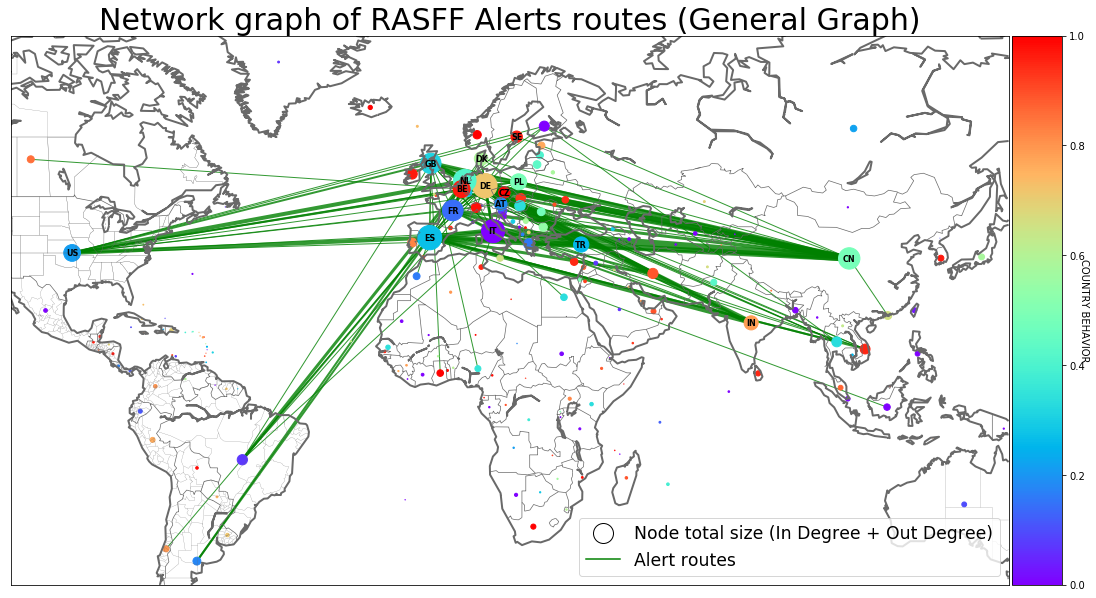

Map 1 successful visualization


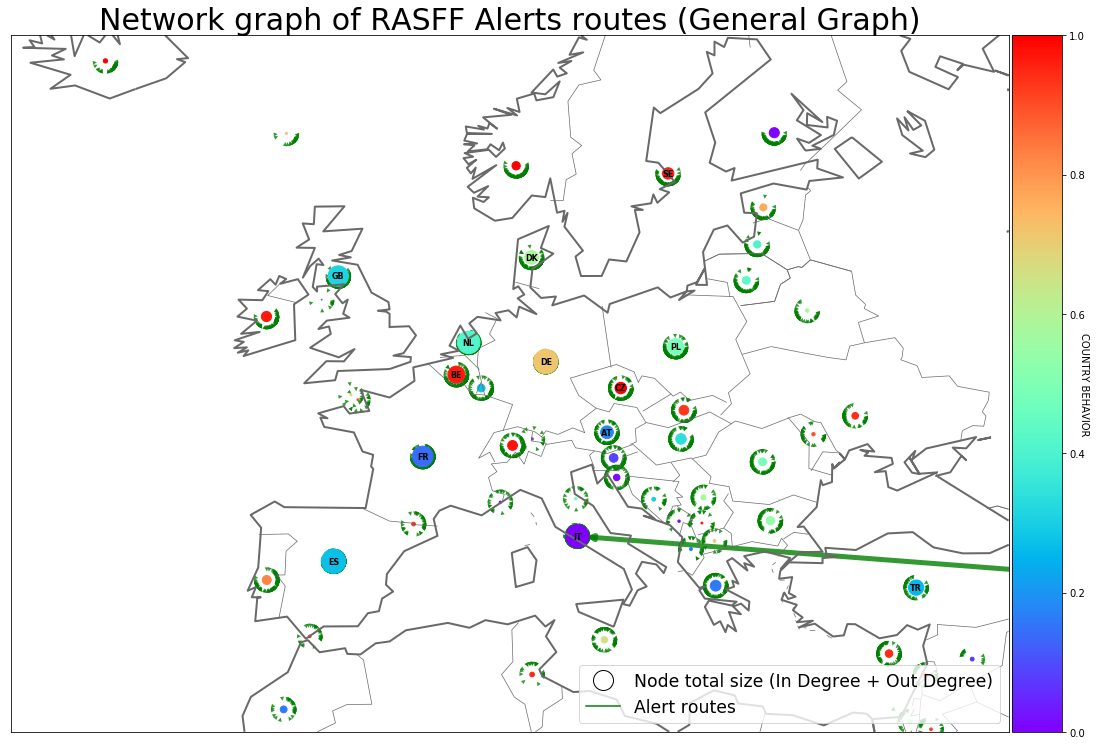

Map 2 successful visualization


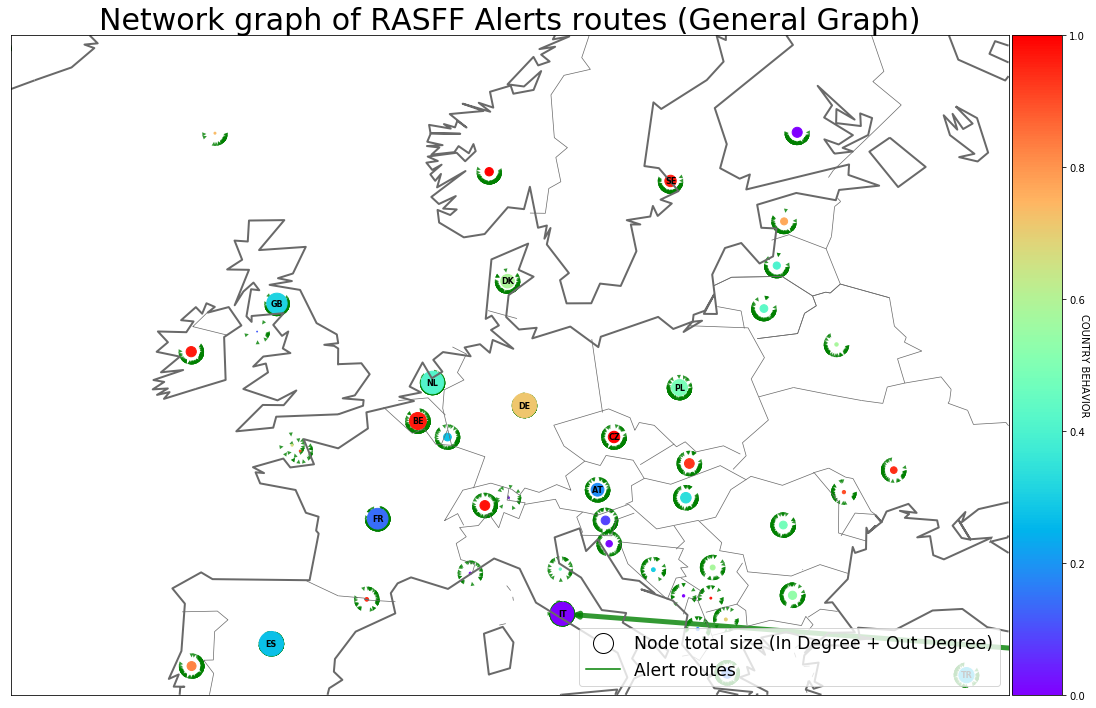

Map 3 successful visualization


In [11]:
draw_map(data,geo_country_data,monthly=False, month = 0)